#  1.INTRODUCTION AND OVERVIEW

### Setting the scene
This project aims to provide SyriaTel with a model to hepl predict whether a customer will soon churn. In an <a href="http://www.dbmarketing.com/telecom/churnreduction.html#:~:text=Annual%20churn%20rates%20for%20telecommunications,the%20way%20they%20are%20treated.">article</a> about churn reduction in the telecom industry by the database marketing institute, it was noted that telecom companies have an annual churn rate between 10%-67%. The article states thst "industry retention surveys have shown that the price and product are important, most people leave any servie because of dissatisfaction with the way they are treated". With this in mind, we aim to highlight areas where customer service could be improved. We find out through a report that SyriaTel has a churn rate of 15% in customers who have been with the company for less than 245 days.
### Defining the question
Build a model to predict if a customer will discontinue their service.

### Objectives
#### Aims:
This project aims to:
*  Investigate labeled data on 3333 customers who have held accounts with the company for less than 243 days
* Provide inferential statistics and visualisations based on the data.
* Build a model from the data available to predict if a customer will discontinue their service. 
#### Main objective
Build a model from the data available to predict if a customer will discontinue their service.

### Specific Objective
To investigate total number of evening charges and the total day charge to determine whether it affects the number of video email messages which affect churn("Churn rate is a measure of the number of customers or employees who leave a company during a given period.")

### Metrics of Success
The model will be considered a success when it achieves an accuracy of 75% and above

### Context
'
While many variables influence customer churn rate, the leading causes of churn can be attributed to one of “the big three:”Average subscription length, Customer acquisition cost, Customer lifetime value (CLV).SyriaTel is a telecommunications company in Syria. They have been informed that some of their customers have started to churn, discontinue their service. This analysis will determine what features will indicate if a customer will ("soon") discontinue their service.
'
###  Data Description
This project utilises data from the <a href = "https://www.kaggle.com/becksddf/churn-in-telecoms-dataset">Curn in Telecom Dataset</a> 

The target variable in this dataset that aimed to predict was identified as _churn_ column
The features of the dataset include locational information( _state_ and _area_code_) as well as plan details such as call munites, charges, customer services calls and whether the customer had an international plan and/or voice plan. Our model iterations utilised subsets of these features as well as aggregations of these features to determine which features would be best predict customer churn.
### Model:
*This project tests a variety of classification models including:

>* Decisioin Tree Classifier
>* Logistic Regression
>* ExtraTreesClassifier
>* KNN Classifier
>* Random Forest Classifer
>* Gradient Boosting Classifer
>* MultinomialNB Classifier              
>* XGB Classifier                
             
## Table of contents
* Data Cleaning and Exploratory Data Analysis (EDA)
* Investigate Target Variable: Churn
* Investigate Features
* First Simple Model: Decision Tree Classifier
* Model Iterations 1 - 6
* Model interpretation
* Conclusion


## _Data Cleaning and Exploratory Data Aanalysis_

In [76]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score,f1_score, confusion_matrix, classification_report, roc_curve, auc, make_scorer, precision_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
  

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from scipy import stats

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, MinMaxScaler


In [77]:
df = pd.read_csv("bigml.csv")
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [78]:
# Check shape of dataframe - 3333 rows and 21 columns
df.shape

(3333, 21)

### _Data cleaning_

In [79]:
# replace spaces with underscores
df.columns = df.columns.str.replace(' ', '_')

In [80]:
# inspect null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   object 
 5   voice_mail_plan         3333 non-null   object 
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

It appears we have no null values in our dataframe (although it is not yet known whether we have any 'disguised' null values yet).

Most of the features are numerical except for state, phone_number, international_plan and voice_mail_plan which are strings and our target churn which is of boolean type.

Let's inspect the unique values of each feature to see if we have any 'null' values 'in disguise' or any values that we don't expect which might be errors:

In [81]:
# inspect unique values of columns to identify potention errors or null values:
for col in df.columns:
    print(f"{col} vals:  {df[col].unique()} \n")

state vals:  ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND'] 

account_length vals:  [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 1



* All states look normal, as expected.
* We can see that columns international_plan and voice_mail_plan are binary features with yes/no values - we might want to change these types later to booleans or 1/0's.
* It is interesting to see that there are only 3 area_codes. It might be worth investigating whether a particular area code has higher churn than another or if it would be safe to simply drop area code. Also, area code would actually be more of a categorical feature rather than an int feature so we will change this data type.
* It would be safe to assume that phone_number has no bearing on whether a person decides to leave the company and so we might choose to drop this column.
* account_length appears to be discrete, with only integer values. The highest value being 243 suggests that this column represents the total number of days the cusomter has had their account open with the company. From the length of time, this dataset must contain relatively new cusomters.
* number_vmail_messages appears to be a discrete variable and there aren't abnormal values here. The highest number of voicemails is 51 which might be high for the average person but could be an indicator of churn so I feel it is worth keeping.
* customer_service_calls vals is also a discrete variable as expected with no apparent abnormal values.
* All minutes, calls and charges columns have reasonable values and nothing stands out as unusual at this stage.
* And of course our target churn has just True/False values as expected.

#### Inspect range and central tendancies of numeric data:

In [82]:
df.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


#### Summary of Features in the Datset
* state: the state the customer lives in
* account length: the number of days the customer has had an account
* area code: the area code of the customer
* phone number: the phone number of the customer
* international plan: true if the customer has the international plan, otherwise false
* voice mail plan: true if the customer has the voice mail plan, otherwise false
* number vmail messages: the number of voicemails the customer has sent
* total day minutes: total number of minutes the customer has been in calls during the day
* total day calls: total number of calls the user has done during the day
* total day charge: total amount of money the customer was charged by the Telecom company for calls during the day
* total eve minutes: total number of minutes the customer has been in calls during the evening
* total eve calls: total number of calls the customer has done during the evening
* total eve charge: total amount of money the customer was charged by the Telecom company for calls during the evening
* total night minutes: total number of minutes the customer has been in calls during the night
* total night calls: total number of calls the customer has done during the night
* total night charge: total amount of money the customer was charged by the Telecom company for calls during the night
* total intl minutes: total number of minutes the user has been in international calls
* total intl calls: total number of international calls the customer has done
* total intl charge: total amount of money the customer was charged by the Telecom company for * international calls
* customer service calls: number of calls the customer has made to customer service
* churn: true if the customer terminated their contract, otherwise false

In [83]:
# Check for duplicated rows, no duplicated rows to deal with.
df.duplicated().sum()

0

In [84]:
# Check for missing values, no missing values.
df.isnull().sum()

state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

#### Drop irrelevant features

In [85]:
df.drop('phone_number', axis = 1, inplace = True)

#### Explore featues

### _Area code_:

Since there were only 3 area codes, it would be interesting to see if there is significant churn within a particular area code or if this column could be dropped from our dataframe.

area_code
408    0.145585
415    0.142598
510    0.148810
Name: churn, dtype: float64


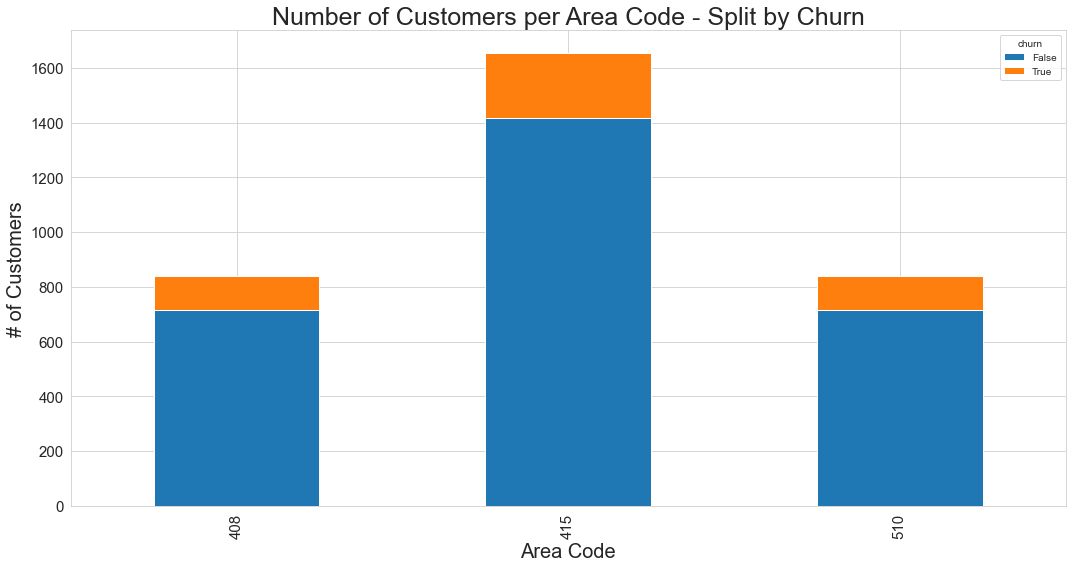

In [86]:
# percentage of churn by area code
print(df.groupby(["area_code"])['churn'].mean())

fig, ax = plt.subplots(figsize = (15, 8))
df.groupby(['area_code', 'churn']).size().unstack().plot(kind='bar', stacked=True, ax = ax);
plt.title('Number of Customers per Area Code - Split by Churn', fontsize = 25)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Area Code', fontsize = 20)
plt.ylabel('# of Customers', fontsize = 20)
plt.tight_layout()
plt.savefig('images/cust_area_code.jpg')

We can see here that customer churn is a consistent rate of roughly 14-15% across all three area codes. Area code 415 has the highest number of customers but still churns the same rate as the other two area codes. For this reason, we choose to drop area code from our dataset.

In [87]:
df.drop('area_code', axis = 1, inplace = True)

#### Minutes, Charge, Calls
It would be safe to assume that minutes/charge/calls columns will probably be related somehow so we inspect their correlation. We might eventually choose to aggregate some of these features during our modelling process but for our first model we will leave them as is.

In [88]:
to_drop = ['state', 'account_length', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'customer_service_calls', 'churn']

In [89]:
# create df of mins/charge/calls variables to see correlations
mins_calls_charge = df.drop(to_drop, axis = 1)
mins_calls_charge.head()

,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge
0,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70
1,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70
2,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29
3,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78
4,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73


In [90]:
# see correlation matrix
mins_calls_charge.corr()

,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge
total_day_minutes,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092
total_day_calls,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666
total_day_charge,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094
total_eve_minutes,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067
total_eve_calls,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674
total_eve_charge,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074
total_night_minutes,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180
total_night_calls,0.022972,-0.019557,0.022972,0.007586,0.007710,0.007596,0.011204,1.000000,0.011188,-0.013605,0.000305,-0.013630
total_night_charge,0.004300,0.022927,0.004301,-0.012593,-0.002056,-0.012601,0.999999,0.011188,1.000000,-0.015214,-0.012329,-0.015186
total_intl_minutes,-0.010155,0.021565,-0.010157,-0.011035,0.008703,-0.011043,-0.015207,-0.013605,-0.015214,1.000000,0.032304,0.999993


You can see here that all *_minutes and *_charge features are perfectly correlated (r = 1). This is to be expected since charge is usually based on minutes. For this reason, we may not need to include both the charge and minutes columns, but rather choose just one. We might also choose to aggregate all the day/eve/night columns into one 'total' column. As mentioned earlier, for a first simple model, we will leave the features as is, but for later iterations we might choose to aggregate and drop these.

#### International Plan
Let's first change international_plan into 1's and 0's for easy binary coding.

1 will represent that the person has an international plan, while 0 will represent not having an international plan.

In [91]:
df.international_plan.replace(('yes', 'no'), (1, 0), inplace = True)

#### Voicemail Plan
Let's do the same for the voice_mail_plan column:

In [92]:
df.voice_mail_plan.replace(('yes', 'no'), (1, 0), inplace = True)

#### View Current Dataframe:

In [93]:
df.head()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### Explore Target Variable: churn
Let's inspect the number churned customers in this dataset:

In [94]:
churn_vals = pd.DataFrame(df.churn.value_counts())
churn_vals

,churn
False,2850
True,483


In [95]:
churn_perc = pd.DataFrame(df.churn.value_counts()/len(df.churn))
churn_perc

,churn
False,0.855086
True,0.144914


#### Visualise:

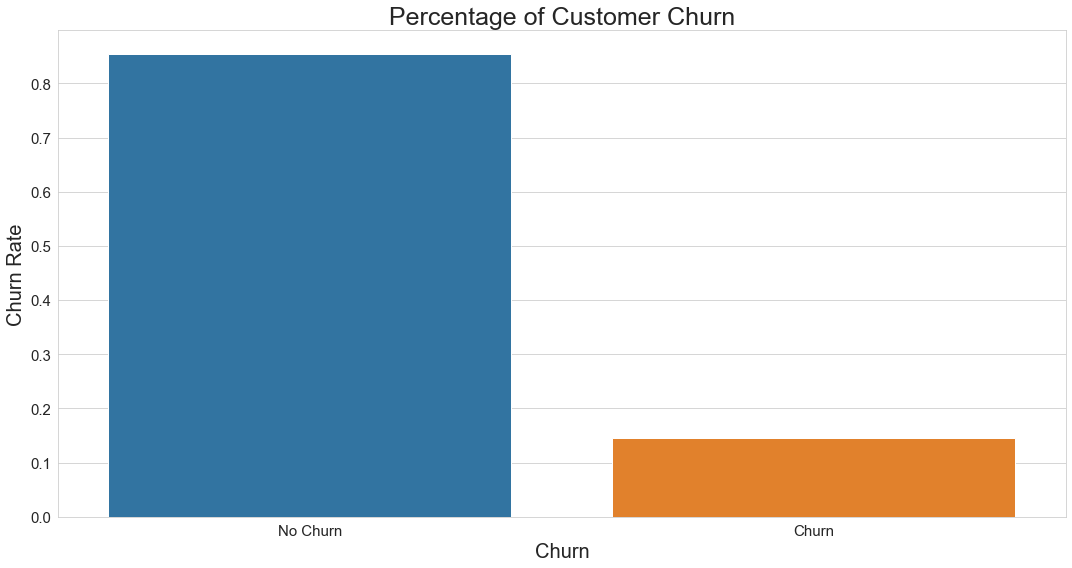

In [96]:
# plot
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x = [0, 1], y = 'churn', data = churn_perc, ax = ax)
plt.title('Percentage of Customer Churn', fontsize = 25)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Churn', fontsize = 20)
plt.ylabel('Churn Rate', fontsize = 20)
ax.set_xticklabels(['No Churn', 'Churn'])
plt.tight_layout()
plt.savefig('images/int_plan_churn.jpg')

### Distribution Plots For Numeric Features

C:\Users\kagir\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kagir\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kagir\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

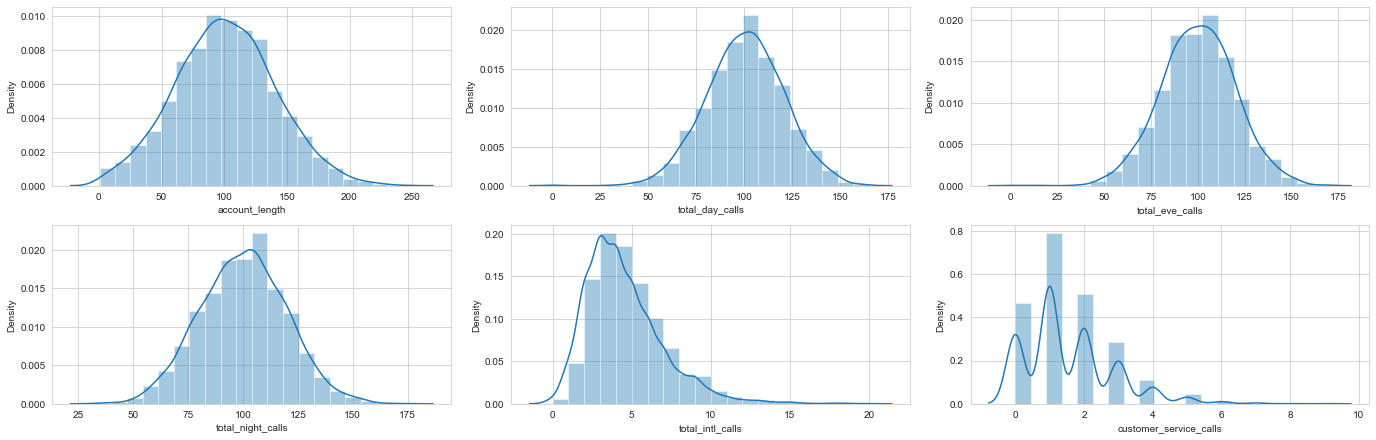

In [97]:
f,ax=plt.subplots(2,3,figsize=(19,6),constrained_layout = True)
sns.distplot(df["account_length"],bins=20,ax=ax[0,0]);

sns.distplot(df["total_day_calls"],bins=20,ax=ax[0,1]);

sns.distplot(df["total_eve_calls"],bins=20,ax=ax[0,2]);

sns.distplot(df["total_night_calls"],bins=20,ax=ax[1,0]);

sns.distplot(df["total_intl_calls"],bins=20,ax=ax[1,1]);

sns.distplot(df["customer_service_calls"],bins=20,ax=ax[1,2]);
plt.savefig('images/distibtion_plots.jpg')

* For the distribution plots of the features above, all of them except customer service calls, have a normal distribution. Total international calls seems to be skewed to the right side however it is still normally distributed.
* Customer service calls has a few peaks, which indicates there are a few modes in the population. This makes sense because customer service calls has to be a integer and not a float number.

#### Pairplots for Numeric Features (Hue as "Churn")

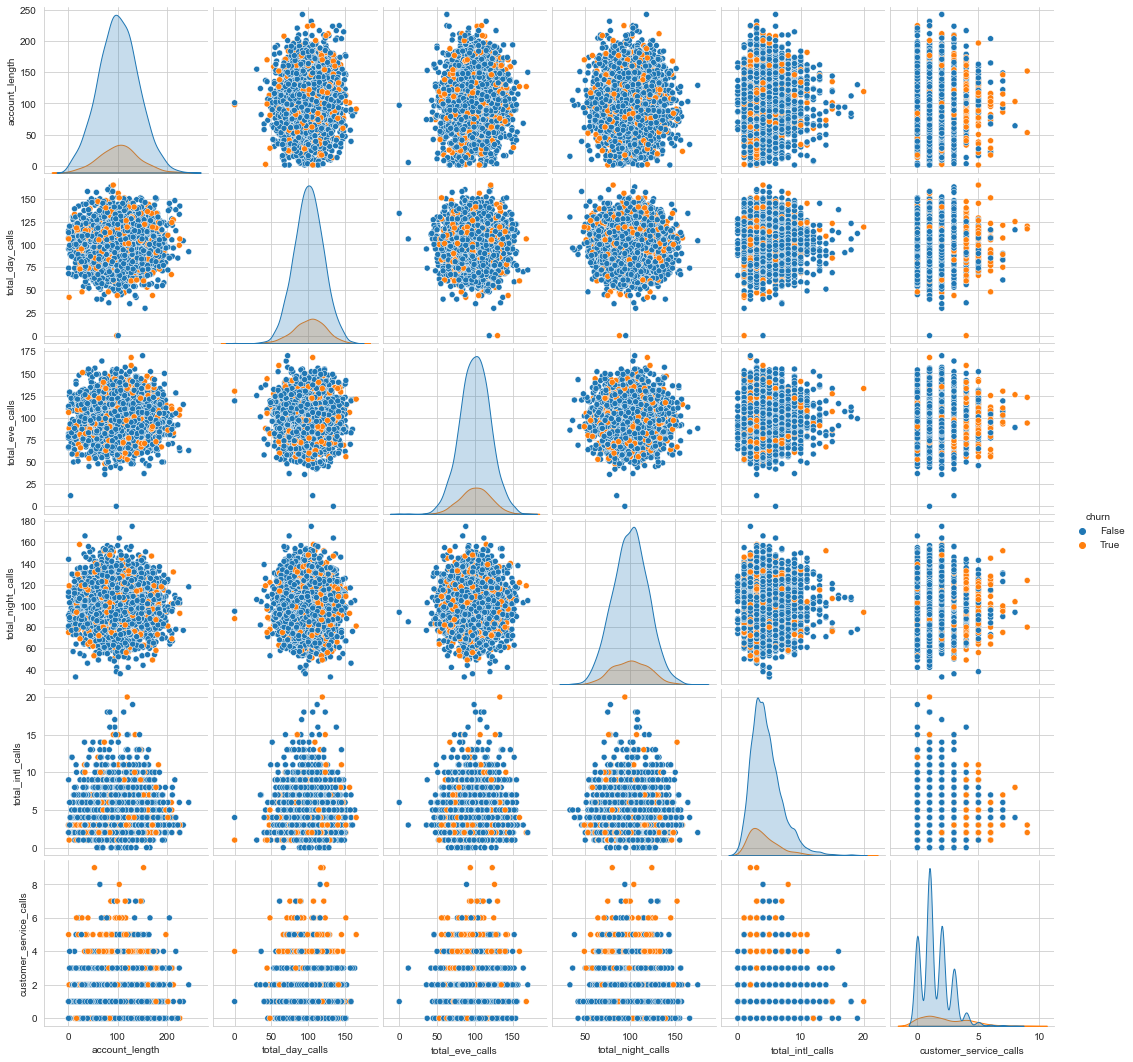

In [98]:
data_temp = df[["account_length","total_day_calls","total_eve_calls","total_night_calls",
                "total_intl_calls","customer_service_calls","churn"]]
sns.pairplot(data_temp, hue="churn",height=2.5);
plt.savefig('images/pairplots.jpg')
plt.show();


#### Correlation heatmap for numeric features

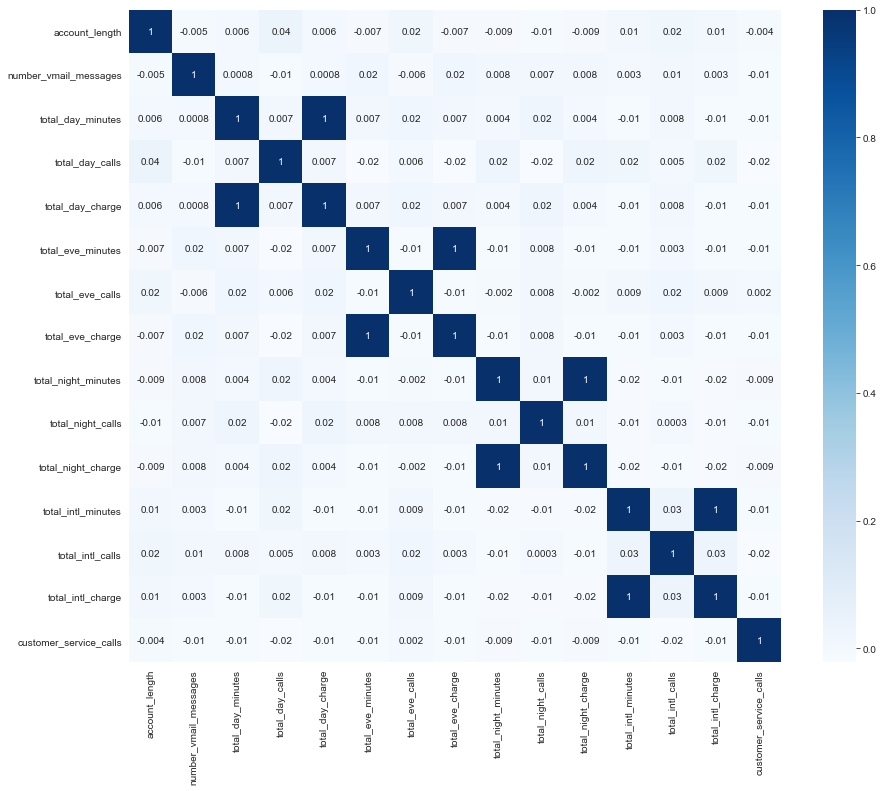

In [99]:
numeric_cols = ['account_length','number_vmail_messages','total_day_minutes','total_day_calls','total_day_charge',
                'total_eve_minutes','total_eve_calls','total_eve_charge','total_night_minutes','total_night_calls',
                'total_night_charge','total_intl_minutes','total_intl_calls','total_intl_charge','customer_service_calls']
corr_mat = df[numeric_cols].corr()
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
plt.subplots(figsize=(15,12))
sns.heatmap(corr_mat, annot=True, cmap='Blues', square=True,fmt='.0g');
plt.xticks(rotation=90);
plt.yticks(rotation=0);
plt.savefig('images/corr_heatmap.jpg')

* Most of the features are not correlated however some do share a perfect correlation.
> * Total day charge and total day minutes features are fully positively correlated.
> * Total eve charge and total eve minutes features are fully positively correlated.
> * Total night charge and total night minutes features are fully positively correlated.
> * Total int charge and total int minutes features are fully positively correlated.
* It makes sense for these features to be perfectly correlated because the charge is a direct result of the minutes used.
* The perfect correlation of 1 indicates the presence of perfect multicollinearity. It does not have the same impact on nonlinear models as it does on linear models. Some nonlinear models are impacted by perfect multicollinearity whereas others are not.

#### Categorical Feature Analysis

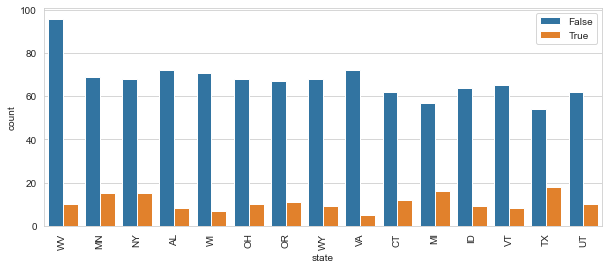

In [100]:
# categoric_cols = ['state','international_plan','voice_mail_plan']
# for i in categoric_cols:
plt.figure(figsize=(10,4))
sns.countplot(x='state', hue="churn", data=df,order= df.state.value_counts().iloc[0:15].index)
plt.xticks(rotation=90)
plt.legend(loc="upper right")
plt.savefig('state2.png')
plt.show()

    

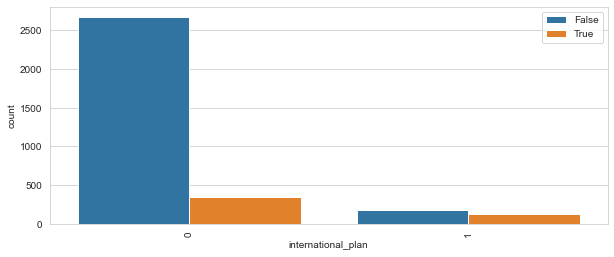

In [101]:
plt.figure(figsize=(10,4))
sns.countplot(x='international_plan', hue="churn", data=df,order= df.international_plan.value_counts().iloc[0:15].index)
plt.xticks(rotation=90)
plt.legend(loc="upper right")
plt.savefig('images/international_plan2.jpeg')
plt.show()

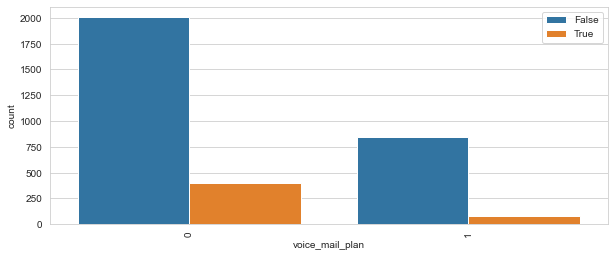

In [102]:
plt.figure(figsize=(10,4))
sns.countplot(x='voice_mail_plan', hue="churn", data=df,order= df.voice_mail_plan.value_counts().iloc[0:15].index)
plt.xticks(rotation=90)
plt.legend(loc="upper right")
plt.savefig('images/voice_mail_plan2.jpeg')
plt.show()

### International Plans

In [103]:
int_plan_churn = pd.DataFrame(df.groupby(['international_plan'])['churn'].mean())
int_plan_churn

,churn
international_plan,
0,0.114950
1,0.424149


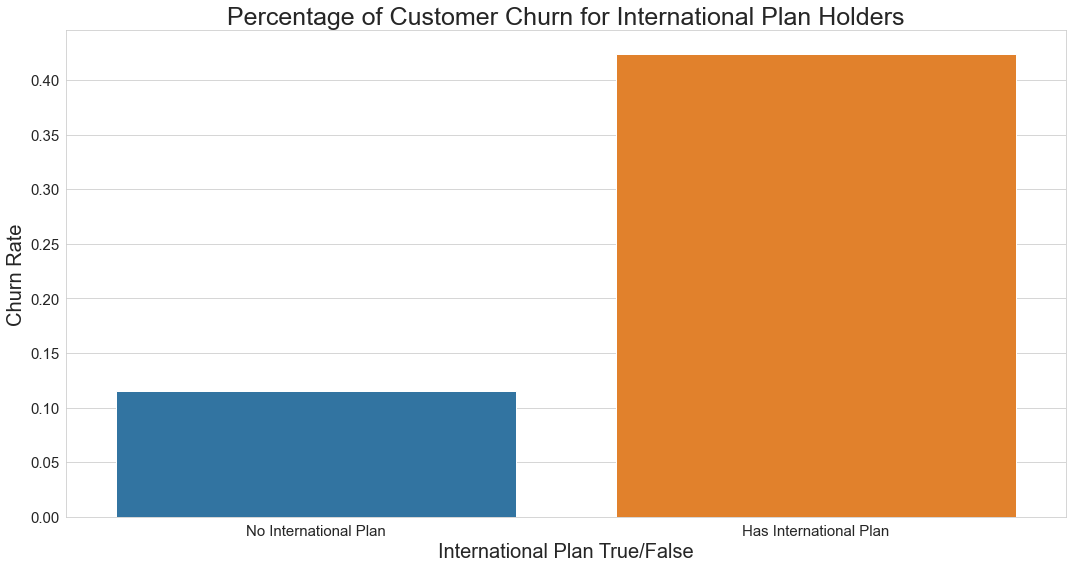

In [104]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x = [0, 1], y = 'churn', data = int_plan_churn, ax = ax)
plt.title('Percentage of Customer Churn for International Plan Holders', fontsize = 25)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('International Plan True/False', fontsize = 20)
plt.ylabel('Churn Rate', fontsize = 20)
ax.set_xticklabels(['No International Plan', 'Has International Plan'])
plt.tight_layout()
plt.savefig('images/international_plan.jpg')

#### Customer Service Calls

In [105]:
csc = pd.DataFrame(df.groupby(['customer_service_calls'])['churn'].mean())
csc

,churn
customer_service_calls,
0,0.131994
1,0.103302
2,0.114625
3,0.102564
4,0.457831
5,0.606061
6,0.636364
7,0.555556
8,0.500000


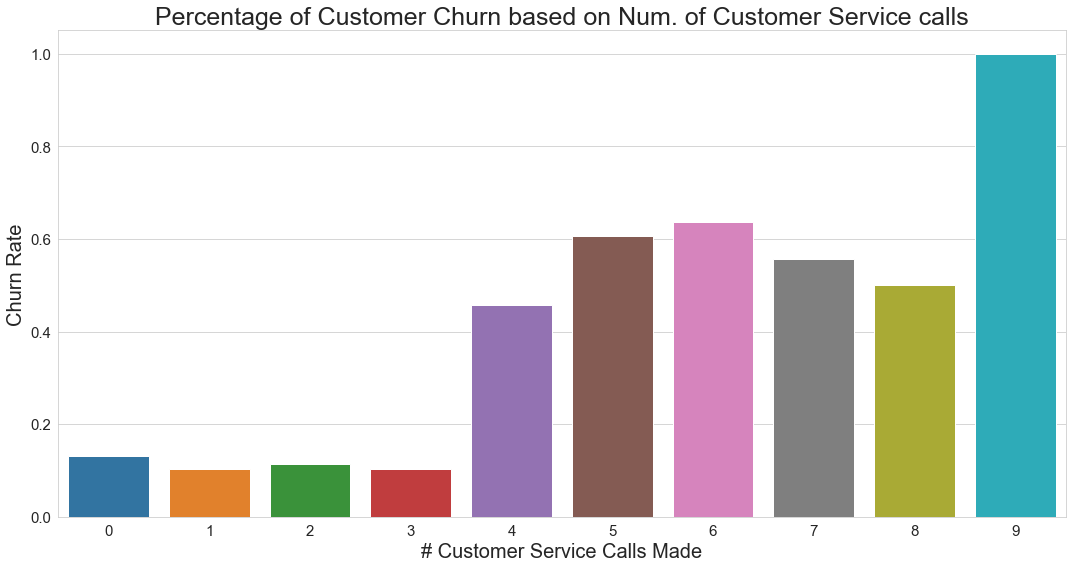

In [106]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], y = 'churn', data = csc, ax = ax)
plt.title('Percentage of Customer Churn based on Num. of Customer Service calls', fontsize = 25)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('# Customer Service Calls Made', fontsize = 20)
plt.ylabel('Churn Rate', fontsize = 20)
plt.tight_layout()
plt.savefig('images/churn_customer_calls.jpg')

There appears to be a huge spike in the rate of churn for customers who make 4 or more calls to customer service. Customers who make this many calls to customer service have a churn rate over 40%. Further investigation should be devoted to looking into the other characteristics of these customers to find out why there was a need to make this many calls to customer service and how the company could better assist these customers.

#### Total Day Charge

We saw earlier that total day charge and total day minutes are perfectly correlated. For this reason, insights found on total day charge would also relate to total day minutes. One of these columns could be dropped from our model.

Let's view the distribution of this feature to inspect for potential outliers or abnormalities:

C:\Users\kagir\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


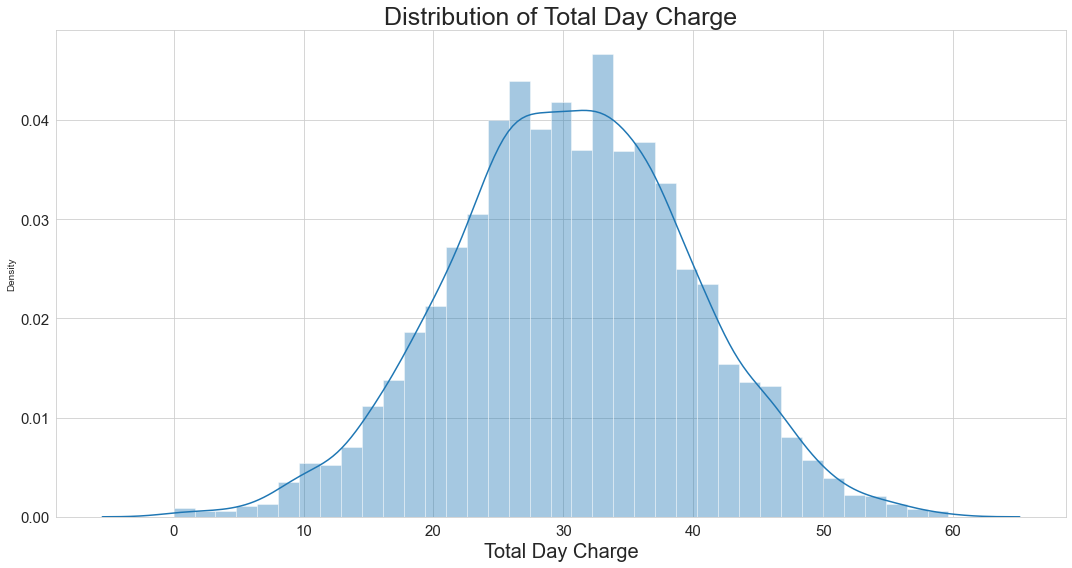

In [107]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Distribution of Total Day Charge', fontsize = 25)
sns.distplot(df.total_day_charge, ax = ax)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Total Day Charge', fontsize = 20)
plt.tight_layout()
plt.savefig('images/dist(total_day_charge).jpg')

This is almost a perfect normal distribution and so we don't detect any unusual activity or outliers for total day charge.

In [108]:
tdc = pd.DataFrame(df.groupby(['total_day_charge'])['churn'].mean())
tdc

,churn
total_day_charge,
0.00,0.5
0.44,0.0
1.33,0.0
1.34,0.0
2.13,0.0
...,...
57.04,1.0
57.36,1.0
58.70,1.0


From the analysis above, customers with total day charges of over roughly $55 have a 100% rate of churn. Perhaps the company could investigate ways to incentivise these particular customers to stay with some added value perks.

Let's inspect the above from our sub-dataframe of total day charge churn rates:

In [109]:
tdc['churn_rate'] = tdc['churn'] * 100
tdc.drop('churn', axis = 1).iloc[-20:]

,churn_rate
total_day_charge,
53.65,0.0
54.03,100.0
54.59,100.0
54.62,100.0
54.67,100.0
54.79,100.0
54.81,100.0
54.83,100.0
55.20,100.0


So again, we see more specifically that all users who had a total day charge of $54.03 or more left the company.

#### State

In [110]:
df.groupby(['state'])['churn'].mean().sort_values(ascending = False)

state
NJ    0.264706
CA    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
MI    0.219178
MS    0.215385
NV    0.212121
WA    0.212121
ME    0.209677
MT    0.205882
AR    0.200000
KS    0.185714
NY    0.180723
MN    0.178571
PA    0.177778
MA    0.169231
CT    0.162162
NC    0.161765
NH    0.160714
GA    0.148148
DE    0.147541
OK    0.147541
OR    0.141026
UT    0.138889
CO    0.136364
KY    0.135593
SD    0.133333
OH    0.128205
FL    0.126984
IN    0.126761
ID    0.123288
WY    0.116883
MO    0.111111
VT    0.109589
AL    0.100000
NM    0.096774
ND    0.096774
WV    0.094340
TN    0.094340
DC    0.092593
RI    0.092308
WI    0.089744
IL    0.086207
NE    0.081967
LA    0.078431
IA    0.068182
VA    0.064935
AZ    0.062500
AK    0.057692
HI    0.056604
Name: churn, dtype: float64

We can see there actually is a fairly diverse range here with a minimum churn in Hawaii of 5.7% and maximum churn in California of 26.5%. Let's visualise this with a map of the country with this data:



We can see there are three states that have particularly high churn: California, New Jersey and Texas. Further investigation should be done to see what is going on in these high churn states to see what trends might be causing this.

### Preparing Data for Modeling

#### Create X, y variables

In [111]:
X = df.drop('churn', axis=1)

y = df.churn

#### Split the data

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

### Encoding Categorical Features

In [113]:
# instantiate ohe object
ohe = OneHotEncoder(sparse = False, handle_unknown = "ignore")

# fit ohe on small train data
ohe.fit(X_train[['state']])
ohe.fit(X_test[['state']])

# access the column names of the states
col_names = ohe.categories_[0]

# make a df with encoded states
train_state_encoded = pd.DataFrame(ohe.transform(X_train[["state"]]), 
                               index = X_train.index, 
                               columns = col_names)
test_state_encoded = pd.DataFrame(ohe.transform(X_test[["state"]]), 
                               index = X_test.index, 
                               columns = col_names)
# combine encoded states with X_t and drop old 'state' column
X_train = pd.concat([X_train.drop("state", axis = 1), train_state_encoded], axis = 1)
X_test = pd.concat([X_test.drop("state", axis = 1), test_state_encoded], axis = 1)

C:\Users\kagir\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\kagir\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [114]:
X_train.head()


,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
367,45,0,0,0,78.2,127,13.29,253.4,108,21.54,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3103,115,0,0,0,195.9,111,33.30,227.0,108,19.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
549,121,0,1,31,237.1,63,40.31,205.6,117,17.48,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2531,180,0,0,0,143.3,134,24.36,180.5,113,15.34,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2378,112,0,0,0,206.2,122,35.05,164.5,94,13.98,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
# Object creation, fitting the data & getting predictions 
lr= LogisticRegression()
lr.fit(X_train,y_train) 
y_pred_lr = lr.predict(X_test) 

C:\Users\kagir\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [116]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

       False       0.85      0.99      0.92       709
        True       0.38      0.04      0.07       125

    accuracy                           0.85       834
   macro avg       0.62      0.51      0.49       834
weighted avg       0.78      0.85      0.79       834



**************** LOGISTIC REGRESSION MODEL RESULTS **************** 
Accuracy score for testing set:  0.84652
F1 score for testing set:  0.07246
Recall score for testing set:  0.04
Precision score for testing set:  0.38462


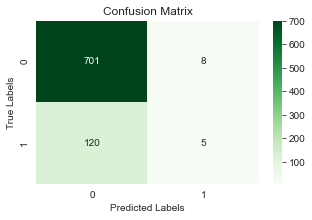

In [117]:

print("**************** LOGISTIC REGRESSION MODEL RESULTS **************** ")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_lr),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_lr),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_lr),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_lr),5))
cm_dt = confusion_matrix(y_test, y_pred_lr)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_dt, annot=True, cmap='Greens', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.savefig('images/matrix2.jpg')

plt.show();

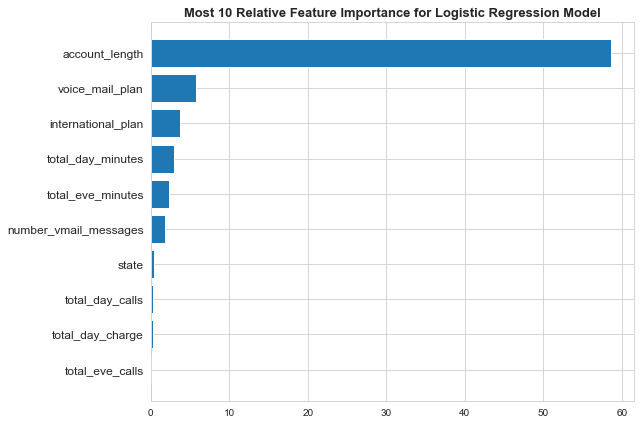

In [118]:
# Feature Importances
feature_importance = abs(lr.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())[0:10]
sorted_idx = np.argsort(feature_importance)[0:10]
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(9, 6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
plt.title('Most 10 Relative Feature Importance for Logistic Regression Model', fontsize=13, fontweight='bold')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=12)

plt.tight_layout()
plt.savefig('images/feature importance1.jpg')
plt.show()


### Dropping Outliers

In [119]:
print("Before dropping numerical outliers, length of the dataframe is: ",len(df))
def drop_numerical_outliers(df, z_thresh=3):
    constrains = df.select_dtypes(include=[np.number]).apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    df.drop(df.index[~constrains], inplace=True)
    
drop_numerical_outliers(df)
print("After dropping numerical outliers, length of the dataframe is: ",len(df))

Before dropping numerical outliers, length of the dataframe is:  3333
After dropping numerical outliers, length of the dataframe is:  2860


### Drop correlated Features

In [120]:
print("The original dataframe has {} columns.".format(df.shape[1]))
# Calculate the correlation matrix and take the absolute value
corr_matrix = df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.90)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.90)]

reduced_df = df.drop(to_drop, axis=1) # Drop the features
print("The reduced dataframe has {} columns.".format(reduced_df.shape[1]))

The original dataframe has 19 columns.
The reduced dataframe has 14 columns.


<ipython-input-120-62d2b461a1a7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()


In [121]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

X_train_sc = MinMaxScaler().fit_transform(X_train)
X_test_sc = MinMaxScaler().fit_transform(X_test)

# model = scaler.fit(X_train)
# models = scaler.fit(X_test)

# X_train_sc = model.transform(X_train)
# X_test_sc = models.transform(X_test)


### Modeling with changes to the X variable

## Decision Tree Classifier

In [122]:
# Object creation, fitting the data & getting predictions
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_sc,y_train)
y_pred_dt = decision_tree.predict(X_test_sc)

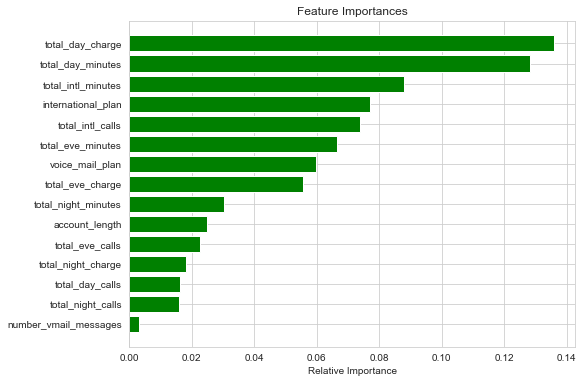

In [123]:
feature_names = list(X_train.columns)
importances = decision_tree.feature_importances_[0:15]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.savefig('images/feature_importance3.jpeg')
plt.show()


In [124]:
print(classification_report(y_test, y_pred_dt, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       709
           1       0.53      0.80      0.64       125

    accuracy                           0.87       834
   macro avg       0.75      0.84      0.78       834
weighted avg       0.90      0.87      0.88       834



**************** DECISION TREE CLASSIFIER MODEL RESULTS **************** 
Accuracy score for testing set:  0.86571
F1 score for testing set:  0.64103
Recall score for testing set:  0.8
Precision score for testing set:  0.53476


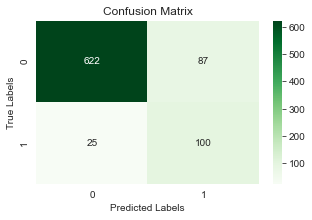

In [125]:
print("**************** DECISION TREE CLASSIFIER MODEL RESULTS **************** ")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_dt),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_dt),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_dt),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_dt),5))
cm_dt = confusion_matrix(y_test, y_pred_dt)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_dt, annot=True, cmap='Greens', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

## Gradient Boost

In [126]:
param_grid = {
    "loss":["exponential", "deviance"],
    "learning_rate": [0.01],
    "min_samples_split": [1.0, 2, 5]
    }

# create gradient boost object for grid searching
gbc = GradientBoostingClassifier(random_state = 42)

# create search object
search = GridSearchCV(estimator = gbc, param_grid = param_grid, n_jobs = -1, cv = 3, scoring='accuracy')

# Train search object
search.fit(X_train_sc, y_train)

# Get best estimator
print('Best parameters: \n\n',search.best_params_,'\n')

C:\Users\kagir\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Best parameters: 

 {'learning_rate': 0.01, 'loss': 'deviance', 'min_samples_split': 2} 



In [127]:

gbc1 = GradientBoostingClassifier(loss = 'deviance', learning_rate = 0.01, min_samples_split = 2, random_state = 42)
search = GridSearchCV(estimator = gbc1, param_grid = param_grid, n_jobs = -1, cv = 3, scoring='accuracy')
search.fit(X_train_sc, y_train)
search.score(X_test_sc, y_test)

C:\Users\kagir\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


0.8609112709832134

In [128]:
gb_pred = search.predict(X_test_sc)


**************** GRADIENT BOOST CLASSIFIER MODEL RESULTS **************** 
Accuracy score for testing set:  0.86091
F1 score for testing set:  0.45794
Recall score for testing set:  0.392
Precision score for testing set:  0.55056


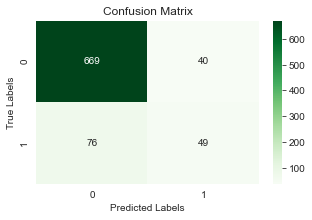

In [129]:
print("**************** GRADIENT BOOST CLASSIFIER MODEL RESULTS **************** ")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,gb_pred),5))
print('F1 score for testing set: ',round(f1_score(y_test,gb_pred),5))
print('Recall score for testing set: ',round(recall_score(y_test,gb_pred),5))
print('Precision score for testing set: ',round(precision_score(y_test,gb_pred),5))
cm_dt = confusion_matrix(y_test, gb_pred)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_dt, annot=True, cmap='Greens', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

### XGB Classifier

In [130]:

clf = XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)
clf.fit(X_train_sc, y_train)
predictions = clf.predict(X_test_sc)
print("accuracy_score",accuracy_score(y_test, predictions))
# print("auc",roc_auc_score(y_test, predictions))
# xg = [clf.__class__,accuracy_score(y_test, predictions),roc_auc_score(y_test, predictions)]

accuracy_score 0.9040767386091128


**************** XGB CLASSIFIER MODEL RESULTS **************** 
Accuracy score for testing set:  0.90408
F1 score for testing set:  0.70588
Recall score for testing set:  0.768
Precision score for testing set:  0.65306


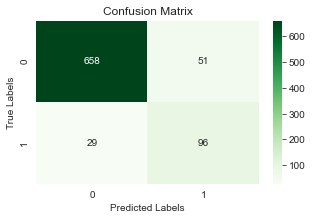

In [131]:
print("**************** XGB CLASSIFIER MODEL RESULTS **************** ")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,predictions),5))
print('F1 score for testing set: ',round(f1_score(y_test,predictions),5))
print('Recall score for testing set: ',round(recall_score(y_test,predictions),5))
print('Precision score for testing set: ',round(precision_score(y_test,predictions),5))
cm_dt = confusion_matrix(y_test, predictions)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_dt, annot=True, cmap='Greens', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

### Multinomial NB

In [132]:

clf = MultinomialNB()
clf.fit(X_train_sc, y_train)
NB_pred = clf.predict(X_test_sc)
print("accuracy_score",accuracy_score(y_test, NB_pred))
# print("auc",roc_auc_score(y_test, NB_pred))
# mnb = [clf.__class__,accuracy_score(y_test, predictions),roc_auc_score(y_test, NB_pred)]

accuracy_score 0.8513189448441247


**************** Multinomial NB CLASSIFIER MODEL RESULTS **************** 
Accuracy score for testing set:  0.85132
F1 score for testing set:  0.08824
Recall score for testing set:  0.048
Precision score for testing set:  0.54545


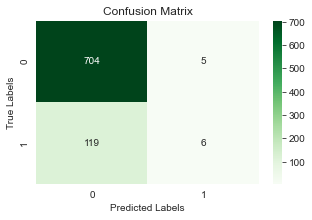

In [133]:
print("**************** Multinomial NB CLASSIFIER MODEL RESULTS **************** ")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,NB_pred),5))
print('F1 score for testing set: ',round(f1_score(y_test,NB_pred),5))
print('Recall score for testing set: ',round(recall_score(y_test,NB_pred),5))
print('Precision score for testing set: ',round(precision_score(y_test,NB_pred),5))
cm_dt = confusion_matrix(y_test, NB_pred)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_dt, annot=True, cmap='Greens', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

### KNN Classifier

In [134]:
clf = KNeighborsClassifier()
clf.fit(X_train_sc, y_train)
knn_pred = clf.predict(X_test_sc)
print("accuracy_score",accuracy_score(y_test, knn_pred))
# print("auc",roc_auc_score(y_test, knn_pred))
# knc = [clf.__class__,accuracy_score(y_test, knn_pred),roc_auc_score(y_test, knn_pred)]

accuracy_score 0.8537170263788969


**************** KNN CLASSIFIER MODEL RESULTS **************** 
Accuracy score for testing set:  0.85372
F1 score for testing set:  0.19737
Recall score for testing set:  0.12
Precision score for testing set:  0.55556


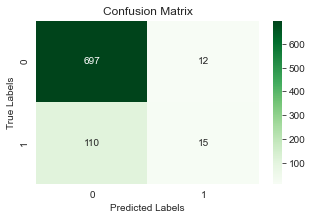

In [135]:
print("**************** KNN CLASSIFIER MODEL RESULTS **************** ")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,knn_pred),5))
print('F1 score for testing set: ',round(f1_score(y_test,knn_pred),5))
print('Recall score for testing set: ',round(recall_score(y_test,knn_pred),5))
print('Precision score for testing set: ',round(precision_score(y_test,knn_pred),5))
cm_dt = confusion_matrix(y_test, knn_pred)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_dt, annot=True, cmap='Greens', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

### Extra Tree Classifier

In [136]:

clf = ExtraTreesClassifier()
clf.fit(X_train_sc, y_train)
ex_pred = clf.predict(X_test_sc)
ex_train_pred = clf.predict(X_train_sc)

print("accuracy_score",accuracy_score(y_test, ex_pred))
# print("auc",roc_auc_score(y_test, ex_pred))
# etc = [clf.__class__,accuracy_score(y_test, ex_pred),roc_auc_score(y_test, ex_pred)]

accuracy_score 0.9292565947242206


**************** EXTRA TREE CLASSIFIER MODEL RESULTS **************** 
Accuracy score for testing set:  0.92926
Accuracy score for training set:  1.0


F1 score for testing set:  0.73778
F1 score for training set:  1.0


Recall score for testing set:  0.664
Recall score for training set:  1.0


Precision score for testing set:  0.83
Precision score for training set:  1.0




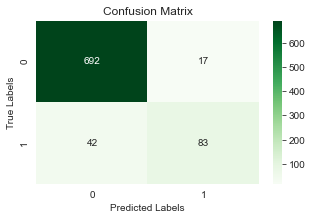

In [137]:
print("**************** EXTRA TREE CLASSIFIER MODEL RESULTS **************** ")
# y_pred_rf_train
print('Accuracy score for testing set: ',round(accuracy_score(y_test,ex_pred),5))
print('Accuracy score for training set: ',round(accuracy_score(y_train,ex_train_pred),5))
print('\n')
print('F1 score for testing set: ',round(f1_score(y_test,ex_pred),5))
print('F1 score for training set: ',round(f1_score(y_train,ex_train_pred),5))
print('\n')
print('Recall score for testing set: ',round(recall_score(y_test,ex_pred),5))
print('Recall score for training set: ',round(recall_score(y_train,ex_train_pred),5))
print('\n')
print('Precision score for testing set: ',round(precision_score(y_test,ex_pred),5))
print('Precision score for training set: ',round(precision_score(y_train,ex_train_pred),5))
print('\n')
cm_dt = confusion_matrix(y_test, ex_pred)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_dt, annot=True, cmap='Greens', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

### Random Forest

In [138]:
rf_model2 = RandomForestClassifier(max_depth=20,min_samples_split=5,n_estimators=500,criterion='entropy', random_state=42) # Object creation
rf_model2.fit(X_train_sc,y_train) # Fitting the data into the algorithm
y_pred_rf = rf_model2.predict(X_test_sc) # Getting the predictions test set
y_pred_rf_train = rf_model2.predict(X_train_sc) # Getting the predictions train set


**************** RANDOM FOREST CLASSIFIER MODEL RESULTS **************** 
Accuracy score for testing set:  0.90048
Accuracy score for training set:  0.98279


F1 score for testing set:  0.64979
F1 score for training set:  0.93611


Recall score for testing set:  0.616
Recall score for training set:  0.87989


Precision score for testing set:  0.6875
Precision score for training set:  1.0




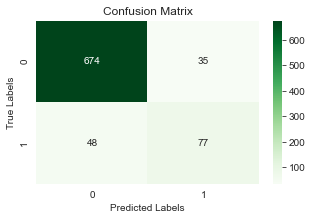

In [139]:
print("**************** RANDOM FOREST CLASSIFIER MODEL RESULTS **************** ")
# y_pred_rf_train
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_rf),5))
print('Accuracy score for training set: ',round(accuracy_score(y_train,y_pred_rf_train),5))
print('\n')
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_rf),5))
print('F1 score for training set: ',round(f1_score(y_train,y_pred_rf_train),5))
print('\n')
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_rf),5))
print('Recall score for training set: ',round(recall_score(y_train,y_pred_rf_train),5))
print('\n')
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_rf),5))
print('Precision score for training set: ',round(precision_score(y_train,y_pred_rf_train),5))
print('\n')
cm_dt = confusion_matrix(y_test, y_pred_rf)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_dt, annot=True, cmap='Greens', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.savefig('images/matrix.png')

plt.show();

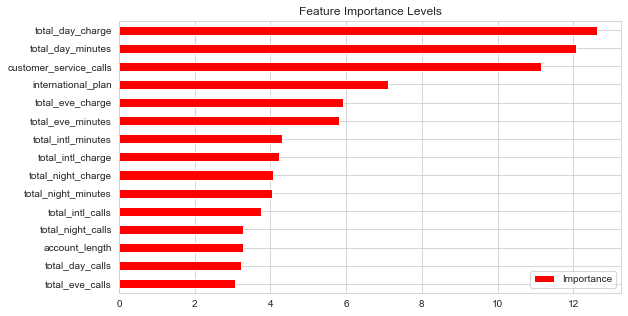

In [140]:
Importance =pd.DataFrame({"Importance": rf_model2.feature_importances_*100},index = X_train.columns)
Importance.sort_values(by = "Importance", axis = 0, ascending = True).tail(15).plot(kind ="barh", color = "r",figsize=(9, 5))
plt.title("Feature Importance Levels");
plt.savefig('images/feature_impotance2.jpeg')
plt.show()

<ipython-input-141-828a2832a0e7>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-141-828a2832a0e7>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-141-828a2832a0e7>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-141-828a2832a0e7>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
<ipython-input-1

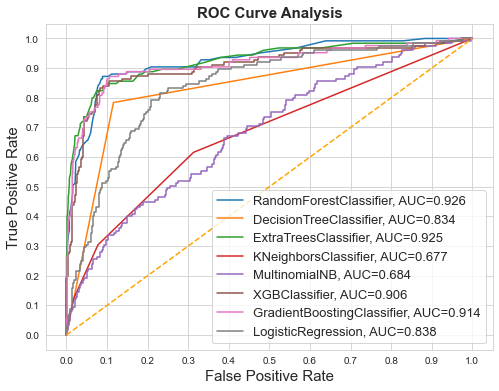

In [141]:
classifiers = [RandomForestClassifier(),
               DecisionTreeClassifier(),
               ExtraTreesClassifier(),
               KNeighborsClassifier(),
               MultinomialNB(),
               XGBClassifier(),
               GradientBoostingClassifier(),
               LogisticRegression()]


# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train_sc, y_train)
    yproba = model.predict_proba(X_test_sc)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.savefig('images/ROC.png')
plt.show()


#### model comparison

In [143]:
# import dataframe_image as dfi
# import nbconvert
comparison_frame = pd.DataFrame({'Model':['Decision Tree Classifier',
                                          'Gradient Boost',
                                          'XGB Classifier',
                                          'Multinomial NB',
                                          'KNN Classifier',
                                          'Extra Tree Classifier',
                                          'Random Forest',
                                          'Logistic Regression' ], 
                                 'F1 Score (Test Set)':[0.64331, 0.45794, 0.70588, 0.08824, 0.19737, 0.73214, 0.64979, 0.07246],
                                 'Recall (Test Set)':[0.80800, 0.39200, 0.76800, 0.04800, 0.12000, 0.65600, 0.61600, 0.04000], 
                                 'Precision (Test Set)':[0.53439, 0.55056, 0.65306, 0.54545, 0.55560, 0.82828, 0.68750, 0.38462],
                                 'Accuracy (Test Set)':[0.86571, 0.86091, 0.90408, 0.85132, 0.85372, 0.92806, 0.90048, 0.84652],
                                 'AUC (Test Set)':[0.83300, 0.91400, 0.90600, 0.68400, 0.67700, 0.92500, 0.92600, 0.83400]}) 

comparison_frame.style.highlight_max(color = 'lightgreen', axis = 0)


# from bokeh.io import export_png, export_svgs
# from bokeh.models import ColumnDataSource, DataTable, TableColumn

# def save_df_as_image(df):
#     source = ColumnDataSource(df)
#     df_columns = [df.index.name]
#     df_columns.extend(df.columns.values)
#     columns_for_table=[]
#     for column in df_columns:
#         columns_for_table.append(TableColumn(field=column, title=column))

#     data_table = DataTable(source=source, columns=columns_for_table,height_policy="auto",width_policy="auto",index_position=None)
#     export_png(data_table, filename = path)
# save_df_as_image(table)


,Model,F1 Score (Test Set),Recall (Test Set),Precision (Test Set),Accuracy (Test Set),AUC (Test Set)
0,Decision Tree Classifier,0.643310,0.808000,0.534390,0.865710,0.833000
1,Gradient Boost,0.457940,0.392000,0.550560,0.860910,0.914000
2,XGB Classifier,0.705880,0.768000,0.653060,0.904080,0.906000
3,Multinomial NB,0.088240,0.048000,0.545450,0.851320,0.684000
4,KNN Classifier,0.197370,0.120000,0.555600,0.853720,0.677000
5,Extra Tree Classifier,0.732140,0.656000,0.828280,0.928060,0.925000
6,Random Forest,0.649790,0.616000,0.687500,0.900480,0.926000
7,Logistic Regression,0.072460,0.040000,0.384620,0.846520,0.834000


Best model:
Our best model was a Random Forest model which produced an AUC of 93.7 on the test data and only 1.8% of the model's predictions on the test data were labeled as false negatives. 

The parameters of this model were:
>* max_depth=20
>* min_samples_split=5
>* n_estimators=500
>* criterion='entropy'

* The ROC curve illustrates the true positive rate against the false positive rate of our classifier.
* The best performing models will have a curve that hugs the upper left of the graph, which is the the random forest classifier in this case. 

### Conclusion and Evaluation
As we can see above the models performed as axpected with thr Random Forest as the best model. 
The model's results were as follows:
> * AUC = 93.5
> * accuracy = 93.3
> * F1 score = 71.1

### Next Steps and Future Investigation:
It was highlighted during the EDA of this project that there are many areas which the company could improve to help reduce high churn factors. Below are some possible suggestions of what could be further investigated:

* Further investigation should be devoted to looking into the other characteristics of these customers to find out why there was a need to make this many calls to customer service and how the company could better assist these customers.
* Given that over 42% of international plan holders churn, further investigation into retention efforts for these customers might be a worthwhile effort.
* Further investigation should be done to see what is going on in these high churn states to see what trends might be causing this.
* Investigate ways to incentivise customers with total day charges over $54 to stay with with the company by creating added value and perks. This investigation found that 100% of these customers churn.